|  Surname | Name   | Matricola   | Accademic Mail   |
|---|---|---|---|
|Rossetto   | Eric     | 982594    | eric.rossetto@studio.unibo.it |
|Wen          | Xiaowei   | 982501  | xiaowei.wen@studio.unibo.it  |  


MSc student in Artificial Intelligence
@ Alma Mater Studiorum, University of Bologna  
August, 2021

# Importing libraries

In [1]:
from z3 import *
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as mpatches
import time
import json

# Defining functions 

In [2]:
from tools import *

# Defining paths

In [ ]:
path = "./instances/" # path to instances

# path to file json, initially should be an empty json file with only the root node empty. 
time_table = "time_no_rot_no_sym.json" 

# Defining function for SMT instance

In [3]:
def vlsi_instance(W, H, dims, width, max_height, time_out = 300):
  """
    Variable declaration
    W: width of all circuits
    H: height of all circuits
    dims: number of circuits
    width: width of the board/ solution
    max_height: maximum height reachable by stacking all circuits. 
    time_out: timeout for the solver in seconds
  """
  # decision variable for the height
  all_constraints = []
  height = Int('height')

  rot = [Int(f"rot_{i}") for i in range(dims)]
  rotation_cons = [And(rot[i]>=0, rot[i]<=1) for i in range(dims)]
  all_constraints += rotation_cons

  # X component of the solution where to place the circuits
  X = [Int(f"X_{i}") for i in range(dims)]
  
  # Y component of the solution where to place the circuits
  Y = [Int(f"Y_{i}") for i in range(dims)]

  # width boundaries constraints
  boundaries_c_width = [And(0 <= X[i], X[i] +(1 - rot[i]) * W[i] +  rot[i]*H[i] <= width) for i in range(dims)]
  all_constraints+= boundaries_c_width

  # height boundaries constraints
  boundaries_c_height = [0 <= Y[i] for i in range(dims)] 
  all_constraints += boundaries_c_height
  
  # height constraints
  height_constraint = [Y[i] + (1 - rot[i]) * H[i] + rot[i] * W[i]  <= height for i in range(dims)]
  all_constraints += height_constraint

  # height constraints
  height_constraint = [Y[i]+H[i]<=height for i in range(dims)]
  all_constraints += height_constraint

  # no overlapping constraints
  no_overlapping = []    
  for i in range(dims):
    for j in range(dims):
      if i != j:
        no_overlapping.append(
                Or(
                X[i] + rot[i] * H[i] + (1 - rot[i]) * W[i] <= X[j],
                Y[i] + rot[i] * W[i] + (1 - rot[i]) * H[i] <= Y[j],
                X[i] - rot[j] * H[j] - (1 - rot[j]) * W[j] >= X[j],
                Y[i] - rot[j] * W[j] - (1 - rot[j]) * H[j] >= Y[j])) 
  all_constraints += no_overlapping

  """
    Solving phase
  """
  solver = Optimize()
  # print(str(all_constraints))
  solver.add(all_constraints)
  # minimizing function
  if time_out != -1:
    solver.set("timeout",time_out*1000)
  solver.minimize(height)
  if solver.check() == sat:
    m = solver.model()
    return int(m.evaluate(height).as_string()), [int(m.evaluate(X[i]).as_string()) for i in range(dims)], \
    [int(m.evaluate(Y[i]).as_string()) for i in range(dims)], \
    [int(m.evaluate(rot[i]).as_string()) for i in range(dims)]
  else:
    print(solver.reason_unknown())
    return None



# Solving
## reading solution time per instance

In [4]:
time_table = "time_rot_no_sym.json"
time_per_instance = []
with open(time_table, "r") as f:
    time_json = json.load(f)

## Getting instances 

In [5]:
path = "../../instances/"
# solve all instances in path
instances = os.listdir(path)

# solve a certain range of the instances
# instances = [f"ins-{i}.txt" for i in range (11,41)]

# solve a specified instance
# instances = [f"ins-{11}.txt"]

# solve those unsolved instances
# instances = []
# for key, value in time_json.items():
#   if value == -1:
#     instances.append(key)


## Solving instances

Instance 1:
Solution (width, height): (8, 8), time: 0.0784s
(8, [5, 0, 5, 0], [0, 0, 3, 3], [0, 1, 1, 0])


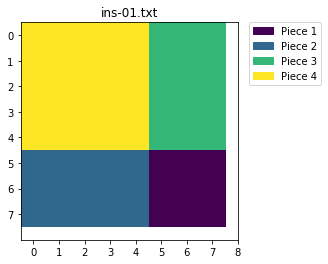

Instance 2:
Solution (width, height): (9, 9), time: 0.0678s
(9, [0, 6, 6, 0, 3], [0, 0, 4, 3, 0], [0, 0, 0, 0, 0])


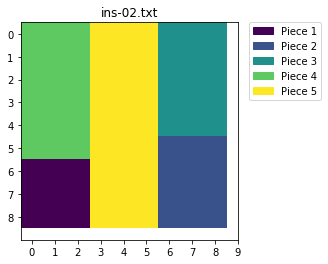

Instance 3:
Solution (width, height): (10, 10), time: 0.202s
(10, [7, 0, 4, 7, 3, 0], [7, 6, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0])


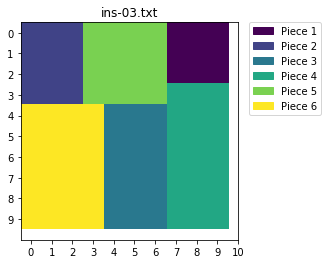

Instance 4:
Solution (width, height): (11, 11), time: 0.515s
(11, [0, 8, 0, 5, 0, 3, 3], [3, 7, 6, 0, 0, 7, 3], [0, 0, 0, 1, 0, 0, 0])


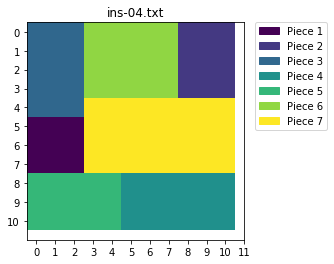

Instance 5:
Solution (width, height): (12, 12), time: 1.022s
(12, [6, 0, 9, 6, 9, 0, 3, 3], [0, 8, 7, 3, 0, 0, 0, 9], [0, 0, 0, 0, 0, 0, 0, 0])


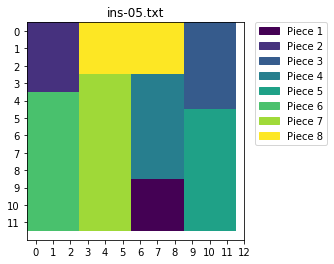

Instance 6:
Solution (width, height): (13, 13), time: 2.9918s
(13, [10, 4, 7, 10, 0, 7, 10, 0, 0], [0, 0, 8, 7, 4, 0, 3, 0, 7], [0, 0, 0, 0, 1, 0, 1, 0, 0])


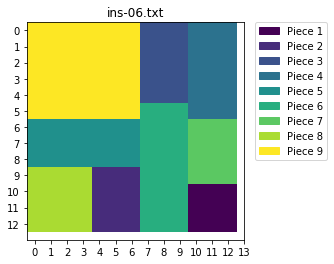

Instance 7:
Solution (width, height): (14, 14), time: 3.2139s
(14, [11, 8, 5, 8, 8, 11, 5, 0, 0], [3, 10, 0, 0, 3, 6, 5, 0, 4], [0, 0, 0, 1, 0, 0, 0, 0, 0])


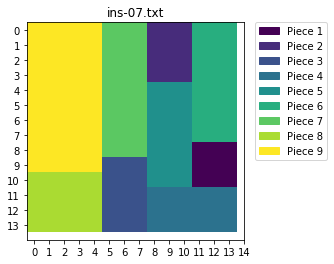

Instance 8:
Solution (width, height): (15, 15), time: 1.1715s
(15, [6, 3, 3, 3, 12, 12, 6, 0, 9, 0], [0, 11, 6, 3, 0, 7, 6, 3, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])


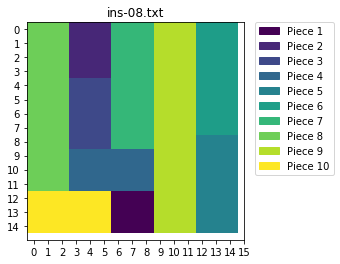

Instance 9:
Solution (width, height): (16, 16), time: 4.258s
(16, [3, 0, 3, 6, 6, 8, 3, 0, 9, 9], [13, 12, 0, 3, 9, 0, 3, 0, 3, 7], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0])


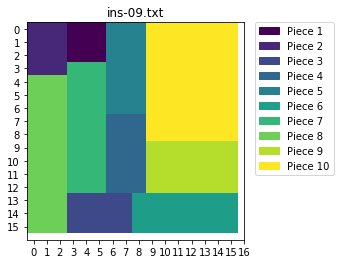

Instance 10:
Solution (width, height): (17, 17), time: 206.9288s
(17, [14, 11, 14, 4, 0, 4, 7, 11, 7, 0, 10, 10], [0, 0, 3, 3, 0, 9, 8, 4, 0, 3, 14, 8], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])


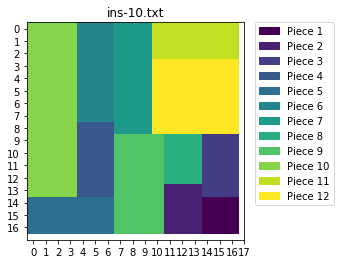

Instance 11:
canceled
Instance 12:
Solution (width, height): (19, 19), time: 4.5538s
(19, [3, 0, 7, 10, 0, 0, 13, 13, 3, 10, 16, 3, 6, 6], [5, 8, 0, 13, 12, 0, 10, 0, 8, 0, 0, 0, 5, 11], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


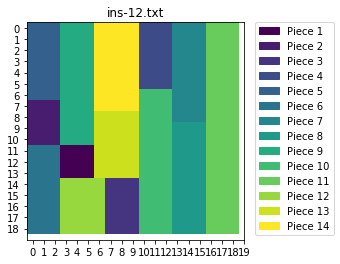

Instance 13:


In [6]:
for i in range(len(instances)):
    # print(path+instance)
    instance = instances[i]
    print(f"Instance {i+1}:")
    width, W, H = read_instance_text(path + instance)
    # print(dims)
    max_height = np.sum([H[i] for i in range(len(H))], dtype=int)
    # print(f"Maximum height reachable: {max_height}")

    start_time = time.time_ns()
    returned_value = vlsi_instance(W, H, len(W), width, max_height)
    if returned_value is not None:
        height, X, Y, rot = returned_value
        end_time = time.time_ns()
        end_time = (end_time - start_time) / 10 ** 9
        print(f"Solution (width, height): {width, height}, time: {round(end_time, 4)}s")
        print(returned_value)
        time_json[instance] = end_time

        # showing solutions
        solutions = dims_sol_unify_rot(W, H, X, Y, rot)
        save_sol_rot("rot_no_sym_sol/" + instance.replace("ins", "sol"), width, height, W, H, X, Y, rot)
        # print(check_sat_rot((width,height), solutions))
        arr = draw_solution_rot((width, height), solutions)
        show_shape(arr, instance, len(W))
    else:
        time_json[instance] = -1


## Saving time table

In [ ]:
with open(time_table, "w") as outfile:
    data = json.dumps(time_json, indent=4, sort_keys=True)
    outfile.write(data)

## Performance Analysis

In [ ]:
acc = 0
counter = 0
for k,v in time_json.items():
    if v != -1:
        acc +=v
        counter+=1

print(f"Number of successfully solved instances: {counter}")
print(f"Average time per instance: {np.round(acc/counter,decimals=2)}/s")

